# GridSearch

In [1]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import sys
import pandas as pd
import numpy as np

2022-10-23 11:46:56.583097: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 11:47:00.619671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-23 11:47:00.619710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-23 11:47:00.998097: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-23 11:47:05.733614: W tensorflow/stream_executor/pla

In [2]:
columns = [
    "num_pregnant",
    "glucose_concentration",
    "blood_pressure",
    "skin_thickness",
    "serum_insulin",
    "BMI",
    "pedigree_function",
    "age",
    "class",
]

data_path = "https://raw.githubusercontent.com/mkhalid1/Machine-Learning-Projects-Python-/master/Grid%20Search/pima-indians-diabetes.csv"

df = pd.read_csv(data_path, names=columns)

In [3]:
df.head()

,num_pregnant,glucose_concentration,blood_pressure,skin_thickness,serum_insulin,BMI,pedigree_function,age,class
0,version https://git-lfs.github.com/spec/v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,oid sha256:9730471d92c4325d45472d7088bbcb30197...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,size 23628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove first 9 non-data rows
df = df.iloc[9:]

# Replace NaN (Not a Number) values with 0 in each column
for col in columns:
    df[col].replace(0, np.NaN, inplace=True)

df.dropna(inplace=True)  # Drop all rows with missing values
dataset = df.values  # Convert dataframe to numpy array

In [5]:
X = dataset[:, 0:8]
Y = dataset[:, 8].astype(int)

# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

# Transform and display the training data
X_standardized = scaler.transform(X)

data = pd.DataFrame(X_standardized)

ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required by StandardScaler.

In [ ]:
def create_model(learn_rate, dropout_rate):
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim=8, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))

    # Compile the model
    adam = Adam(lr=learn_rate)
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model

# Training the Model without Grid Search

In [ ]:
# Declare parameter values
dropout_rate = 0.1
epochs = 1
batch_size = 20
learn_rate = 0.001

# Create the model object by calling the create_model function we created above
model = create_model(learn_rate, dropout_rate)

# Fit the model onto the training data
model.fit(X_standardized, Y, batch_size=batch_size, epochs=epochs, verbose=1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





130/130 [==============================] - 2s 18ms/step - loss: 0.6829 - acc: 0.9538


# Optimizing Hyper-parameters using Grid Search

In [ ]:
def create_model(learn_rate, dropout_rate):
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim=8, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))

    # Compile the model
    adam = Adam(lr=learn_rate)
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model


# Create the model
model = KerasClassifier(build_fn=create_model, verbose=1)

In [ ]:
# Define the parameters that you wish to use in your Grid Search along
# with the list of values that you wish to try out
learn_rate = [0.001, 0.02, 0.2]
dropout_rate = [0.0, 0.2, 0.4]
batch_size = [10, 20, 30]
epochs = [1, 5, 10]

seed = 42

# Make a dictionary of the grid search parameters
param_grid = dict(
    learn_rate=learn_rate,
    dropout_rate=dropout_rate,
    batch_size=batch_size,
    epochs=epochs,
)

# Build and fit the GridSearchCV
grid = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=KFold(random_state=seed), verbose=10
)

grid_results = grid.fit(X_standardized, Y)

# Summarize the results in a readable format
print(
    "Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_)
)

means = grid_results.cv_results_["mean_test_score"]
stds = grid_results.cv_results_["std_test_score"]
params = grid_results.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("{0} ({1}) with: {2}".format(mean, stdev, param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....
Epoch 1/1
26/26 [==============================] - 0s 5ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=0.962, total=   1.6s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


Epoch 1/1
26/26 [==============================] - 0s 5ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=1.000, total=   1.9s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


Epoch 1/1
26/26 [==============================] - 0s 6ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=1.000, total=   2.0s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s remaining:    0.0s


Epoch 1/1
26/26 [==============================] - 0s 11ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=0.923, total=   1.8s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001 .....


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.2s remaining:    0.0s


Epoch 1/1
26/26 [==============================] - 0s 8ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.001, score=1.000, total=   1.9s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.0s remaining:    0.0s


Epoch 1/1
26/26 [==============================] - 0s 8ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02, score=1.000, total=   2.3s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.3s remaining:    0.0s


Epoch 1/1
26/26 [==============================] - 0s 9ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02, score=1.000, total=   1.9s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.3s remaining:    0.0s


Epoch 1/1
26/26 [==============================] - 0s 12ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02, score=1.000, total=   2.0s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.3s remaining:    0.0s


Epoch 1/1
26/26 [==============================] - 0s 16ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02, score=1.000, total=   2.0s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02 ......


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.4s remaining:    0.0s


Epoch 1/1
26/26 [==============================] - 0s 14ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.02, score=1.000, total=   2.2s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.2 .......
Epoch 1/1
26/26 [==============================] - 0s 14ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.2, score=1.000, total=   2.5s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.2 .......
Epoch 1/1
26/26 [==============================] - 0s 14ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.2, score=1.000, total=   2.2s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.2 .......
Epoch 1/1
26/26 [==============================] - 0s 15ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.2, score=1.000, total=   2.3s
[CV] batch_size=10, dropout_rate=0.0, epochs=1, learn_rate=0.2 .......
Epoch 1/1
26/26 [==============================] - 0s 16ms/step
[CV]  batch_size=10, dropou

104/104 [==============================] - 0s 541us/step - loss: 0.6639 - acc: 1.0000
Epoch 5/10
104/104 [==============================] - 0s 513us/step - loss: 0.6540 - acc: 1.0000
Epoch 6/10
104/104 [==============================] - 0s 463us/step - loss: 0.6433 - acc: 1.0000
Epoch 7/10
104/104 [==============================] - 0s 533us/step - loss: 0.6314 - acc: 1.0000
Epoch 8/10
104/104 [==============================] - 0s 396us/step - loss: 0.6181 - acc: 1.0000
Epoch 9/10
104/104 [==============================] - 0s 434us/step - loss: 0.6031 - acc: 1.0000
Epoch 10/10
26/26 [==============================] - 1s 36ms/step
[CV]  batch_size=10, dropout_rate=0.0, epochs=10, learn_rate=0.001, score=1.000, total=   4.8s
[CV] batch_size=10, dropout_rate=0.0, epochs=10, learn_rate=0.001 ....
Epoch 1/10
104/104 [==============================] - 3s 28ms/step - loss: 0.6840 - acc: 0.9904
Epoch 2/10
104/104 [==============================] - 0s 372us/step - loss: 0.6672 - acc: 1.0000
Epoc

Epoch 1/10
104/104 [==============================] - 3s 31ms/step - loss: 0.1220 - acc: 0.9231
Epoch 2/10
104/104 [==============================] - 0s 550us/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 3/10
104/104 [==============================] - 0s 376us/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 4/10
104/104 [==============================] - 0s 396us/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 5/10
104/104 [==============================] - 0s 448us/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 6/10
104/104 [==============================] - 0s 472us/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 7/10
104/104 [==============================] - 0s 473us/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 8/10
104/104 [==============================] - 0s 473us/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 9/10
104/104 [==============================] - 0s 509us/step - loss: 1.0000e-07 - acc: 1.0000
Epoch 10/10
26/26 [==============================] - 1s 47ms/step
[CV]  batch_size=10, dropout_r

Epoch 1/1
26/26 [==============================] - 2s 60ms/step
[CV]  batch_size=10, dropout_rate=0.2, epochs=1, learn_rate=0.02, score=1.000, total=   6.9s
[CV] batch_size=10, dropout_rate=0.2, epochs=1, learn_rate=0.02 ......
Epoch 1/1
26/26 [==============================] - 2s 77ms/step
[CV]  batch_size=10, dropout_rate=0.2, epochs=1, learn_rate=0.02, score=1.000, total=   7.5s
[CV] batch_size=10, dropout_rate=0.2, epochs=1, learn_rate=0.02 ......
Epoch 1/1
26/26 [==============================] - 2s 79ms/step
[CV]  batch_size=10, dropout_rate=0.2, epochs=1, learn_rate=0.02, score=1.000, total=   8.5s
[CV] batch_size=10, dropout_rate=0.2, epochs=1, learn_rate=0.2 .......
Epoch 1/1
26/26 [==============================] - 2s 69ms/step
[CV]  batch_size=10, dropout_rate=0.2, epochs=1, learn_rate=0.2, score=1.000, total=   7.9s
[CV] batch_size=10, dropout_rate=0.2, epochs=1, learn_rate=0.2 .......
Epoch 1/1
26/26 [==============================] - 2s 68ms/step
[CV]  batch_size=10, drop

26/26 [==============================] - 3s 123ms/step
[CV]  batch_size=10, dropout_rate=0.2, epochs=10, learn_rate=0.001, score=1.000, total=  13.0s
[CV] batch_size=10, dropout_rate=0.2, epochs=10, learn_rate=0.001 ....
Epoch 1/10
104/104 [==============================] - 8s 76ms/step - loss: 0.6833 - acc: 0.8942
Epoch 2/10
104/104 [==============================] - 0s 781us/step - loss: 0.6606 - acc: 1.0000
Epoch 3/10
104/104 [==============================] - 0s 907us/step - loss: 0.6416 - acc: 1.0000
Epoch 4/10
104/104 [==============================] - 0s 902us/step - loss: 0.6144 - acc: 1.0000
Epoch 5/10
104/104 [==============================] - 0s 879us/step - loss: 0.6016 - acc: 1.0000
Epoch 6/10
104/104 [==============================] - 0s 908us/step - loss: 0.5725 - acc: 1.0000
Epoch 7/10
104/104 [==============================] - 0s 761us/step - loss: 0.5320 - acc: 1.0000
Epoch 8/10
104/104 [==============================] - 0s 992us/step - loss: 0.4993 - acc: 1.0000
Epoc

26/26 [==============================] - 4s 166ms/step
[CV]  batch_size=10, dropout_rate=0.4, epochs=1, learn_rate=0.02, score=1.000, total=  14.8s
[CV] batch_size=10, dropout_rate=0.4, epochs=1, learn_rate=0.02 ......
Epoch 1/1
26/26 [==============================] - 4s 142ms/step
[CV]  batch_size=10, dropout_rate=0.4, epochs=1, learn_rate=0.02, score=1.000, total=  16.4s
[CV] batch_size=10, dropout_rate=0.4, epochs=1, learn_rate=0.02 ......
Epoch 1/1
26/26 [==============================] - 4s 146ms/step
[CV]  batch_size=10, dropout_rate=0.4, epochs=1, learn_rate=0.02, score=1.000, total=  14.4s
[CV] batch_size=10, dropout_rate=0.4, epochs=1, learn_rate=0.02 ......
Epoch 1/1
26/26 [==============================] - 4s 152ms/step
[CV]  batch_size=10, dropout_rate=0.4, epochs=1, learn_rate=0.02, score=1.000, total=  15.2s
[CV] batch_size=10, dropout_rate=0.4, epochs=1, learn_rate=0.02 ......
Epoch 1/1
26/26 [==============================] - 5s 184ms/step
[CV]  batch_size=10, dropout_

104/104 [==============================] - 0s 900us/step - loss: 0.5899 - acc: 1.0000
Epoch 6/10
104/104 [==============================] - 0s 751us/step - loss: 0.5718 - acc: 1.0000
Epoch 7/10
104/104 [==============================] - 0s 975us/step - loss: 0.5442 - acc: 1.0000
Epoch 8/10
104/104 [==============================] - 0s 850us/step - loss: 0.5175 - acc: 1.0000
Epoch 9/10
104/104 [==============================] - 0s 925us/step - loss: 0.4807 - acc: 1.0000
Epoch 10/10
26/26 [==============================] - 5s 199ms/step
[CV]  batch_size=10, dropout_rate=0.4, epochs=10, learn_rate=0.001, score=1.000, total=  26.7s
[CV] batch_size=10, dropout_rate=0.4, epochs=10, learn_rate=0.001 ....
Epoch 1/10
104/104 [==============================] - 15s 144ms/step - loss: 0.6919 - acc: 0.8173
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 0.6852 - acc: 1.0000
Epoch 3/10
104/104 [==============================] - 0s 804us/step - loss: 0.6793 - acc: 1.0000
Epo

104/104 [==============================] - 0s 1ms/step - loss: 0.1776 - acc: 1.0000
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 0.1612 - acc: 1.0000
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 0.1351 - acc: 1.0000
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 0.1323 - acc: 1.0000
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 0.1223 - acc: 1.0000
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 0.1136 - acc: 1.0000
Epoch 10/10
26/26 [==============================] - 6s 238ms/step
[CV]  batch_size=10, dropout_rate=0.4, epochs=10, learn_rate=0.02, score=1.000, total=  24.9s
[CV] batch_size=10, dropout_rate=0.4, epochs=10, learn_rate=0.2 ......
Epoch 1/10
104/104 [==============================] - 17s 164ms/step - loss: 0.3749 - acc: 0.9231
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 0.0711 - acc: 1.0000
Epoch 3/10
104/1

Epoch 1/5
104/104 [==============================] - 22s 209ms/step - loss: 0.6307 - acc: 0.9712
Epoch 2/5
104/104 [==============================] - 0s 687us/step - loss: 0.3934 - acc: 1.0000
Epoch 3/5
104/104 [==============================] - 0s 594us/step - loss: 0.1458 - acc: 1.0000
Epoch 4/5
104/104 [==============================] - 0s 551us/step - loss: 0.0310 - acc: 1.0000
Epoch 5/5
26/26 [==============================] - 8s 293ms/step
[CV]  batch_size=20, dropout_rate=0.0, epochs=5, learn_rate=0.02, score=1.000, total=  30.4s
[CV] batch_size=20, dropout_rate=0.0, epochs=5, learn_rate=0.02 ......
Epoch 1/5
104/104 [==============================] - 20s 194ms/step - loss: 0.6399 - acc: 0.8558
Epoch 2/5
104/104 [==============================] - 0s 668us/step - loss: 0.4293 - acc: 1.0000
Epoch 3/5
104/104 [==============================] - 0s 571us/step - loss: 0.1783 - acc: 1.0000
Epoch 4/5
104/104 [==============================] - 0s 600us/step - loss: 0.0423 - acc: 1.0000
E

Epoch 1/10
104/104 [==============================] - 21s 207ms/step - loss: 0.6236 - acc: 0.9904
Epoch 2/10
104/104 [==============================] - 0s 611us/step - loss: 0.3739 - acc: 1.0000
Epoch 3/10
104/104 [==============================] - 0s 685us/step - loss: 0.1329 - acc: 1.0000
Epoch 4/10
104/104 [==============================] - 0s 647us/step - loss: 0.0290 - acc: 1.0000
Epoch 5/10
104/104 [==============================] - 0s 713us/step - loss: 0.0062 - acc: 1.0000
Epoch 6/10
104/104 [==============================] - 0s 585us/step - loss: 0.0017 - acc: 1.0000
Epoch 7/10
104/104 [==============================] - 0s 808us/step - loss: 5.7769e-04 - acc: 1.0000
Epoch 8/10
104/104 [==============================] - 0s 883us/step - loss: 3.1500e-04 - acc: 1.0000
Epoch 9/10
104/104 [==============================] - 0s 874us/step - loss: 2.1471e-04 - acc: 1.0000
Epoch 10/10
26/26 [==============================] - 8s 321ms/step
[CV]  batch_size=20, dropout_rate=0.0, epochs=1

Epoch 1/1
26/26 [==============================] - 9s 328ms/step
[CV]  batch_size=20, dropout_rate=0.2, epochs=1, learn_rate=0.001, score=0.923, total=  33.4s
[CV] batch_size=20, dropout_rate=0.2, epochs=1, learn_rate=0.001 .....
Epoch 1/1
26/26 [==============================] - 9s 335ms/step
[CV]  batch_size=20, dropout_rate=0.2, epochs=1, learn_rate=0.001, score=1.000, total=  34.9s
[CV] batch_size=20, dropout_rate=0.2, epochs=1, learn_rate=0.02 ......
Epoch 1/1
26/26 [==============================] - 9s 345ms/step
[CV]  batch_size=20, dropout_rate=0.2, epochs=1, learn_rate=0.02, score=1.000, total=  32.9s
[CV] batch_size=20, dropout_rate=0.2, epochs=1, learn_rate=0.02 ......
Epoch 1/1
26/26 [==============================] - 9s 336ms/step
[CV]  batch_size=20, dropout_rate=0.2, epochs=1, learn_rate=0.02, score=1.000, total=  35.3s
[CV] batch_size=20, dropout_rate=0.2, epochs=1, learn_rate=0.02 ......
Epoch 1/1
26/26 [==============================] - 10s 388ms/step
[CV]  batch_size

104/104 [==============================] - 0s 1ms/step - loss: 0.0751 - acc: 1.0000
Epoch 4/5
104/104 [==============================] - 0s 946us/step - loss: 0.0267 - acc: 1.0000
Epoch 5/5
26/26 [==============================] - 10s 380ms/step
[CV]  batch_size=20, dropout_rate=0.2, epochs=5, learn_rate=0.02, score=1.000, total=  38.4s
[CV] batch_size=20, dropout_rate=0.2, epochs=5, learn_rate=0.02 ......
Epoch 1/5
104/104 [==============================] - 30s 284ms/step - loss: 0.5862 - acc: 0.9712
Epoch 2/5
104/104 [==============================] - 0s 562us/step - loss: 0.2678 - acc: 1.0000
Epoch 3/5
104/104 [==============================] - 0s 834us/step - loss: 0.0866 - acc: 1.0000
Epoch 4/5
104/104 [==============================] - ETA: 0s - loss: 0.0271 - acc: 1.000 - 0s 710us/step - loss: 0.0429 - acc: 1.0000
Epoch 5/5
26/26 [==============================] - 10s 395ms/step
[CV]  batch_size=20, dropout_rate=0.2, epochs=5, learn_rate=0.02, score=1.000, total=  41.0s
[CV] bat

## Example 2

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    # Compile model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.729167 using {'batch_size': 10, 'epochs': 100}
0.524740 (0.137158) with: {'batch_size': 10, 'epochs': 10}
0.674479 (0.018136) with: {'batch_size': 10, 'epochs': 50}
0.729167 (0.003683) with: {'batch_size': 10, 'epochs': 100}
0.582031 (0.036225) with: {'batch_size': 20, 'epochs': 10}
0.559896 (0.132940) with: {'batch_size': 20, 'epochs': 50}
0.591146 (0.189559) with: {'batch_size': 20, 'epochs': 100}
0.582031 (0.052698) with: {'batch_size': 40, 'epochs': 10}
0.561198 (0.168327) with: {'batch_size': 40, 'epochs': 50}
0.699219 (0.028348) with: {'batch_size': 40, 'epochs': 100}
0.567708 (0.004872) with: {'batch_size': 60, 'epochs': 10}
0.671875 (0.032369) with: {'batch_size': 60, 'epochs': 50}
0.662760 (0.033197) with: {'batch_size': 60, 'epochs': 100}
0.526042 (0.119693) with: {'batch_size': 80, 'epochs': 10}
0.604167 (0.027126) with: {'batch_size': 80, 'epochs': 50}
0.660156 (0.008438) with: {'batch_size': 80, 'epochs': 100}
0.601562 (0.033754) with: {'batch_size': 100, 'epochs':

### Training Optimization Algorithm

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    # Compile model
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ["SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax", "Nadam"]
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.735677 using {'optimizer': 'Adam'}
0.651042 (0.024774) with: {'optimizer': 'SGD'}
0.696615 (0.019488) with: {'optimizer': 'RMSprop'}
0.677083 (0.001841) with: {'optimizer': 'Adagrad'}
0.651042 (0.050664) with: {'optimizer': 'Adadelta'}
0.735677 (0.041626) with: {'optimizer': 'Adam'}
0.630208 (0.052634) with: {'optimizer': 'Adamax'}
0.597656 (0.152927) with: {'optimizer': 'Nadam'}


### Tune Learning Rate and Momentum

In [ ]:
# Use scikit-learn to grid search the learning rate and momentum
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.664063 using {'learn_rate': 0.001, 'momentum': 0.6}
0.549479 (0.122962) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.350260 (0.026557) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.658854 (0.012890) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.664063 (0.037603) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.656250 (0.030425) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.660156 (0.030758) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.651042 (0.024774) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.544271 (0.146518) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.651042 (0.024774) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.427083 (0.134575) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.651042 (0.024774) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.651042 (0.024774) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.572917 (0.134575) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.466146 (0.149269) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.651042 (0.024774) with: {'learn_rate':

### Tune Network Weight Initialization

In [ ]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(init_mode="uniform"):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation="relu"))
    model.add(Dense(1, kernel_initializer=init_mode, activation="sigmoid"))
    # Compile model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = [
    "uniform",
    "lecun_uniform",
    "normal",
    "zero",
    "glorot_normal",
    "glorot_uniform",
    "he_normal",
    "he_uniform",
]
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.730469 using {'init_mode': 'uniform'}
0.730469 (0.017758) with: {'init_mode': 'uniform'}
0.710938 (0.008438) with: {'init_mode': 'lecun_uniform'}
0.727865 (0.016053) with: {'init_mode': 'normal'}
0.651042 (0.024774) with: {'init_mode': 'zero'}
0.688802 (0.033502) with: {'init_mode': 'glorot_normal'}
0.550781 (0.164712) with: {'init_mode': 'glorot_uniform'}
0.657552 (0.067231) with: {'init_mode': 'he_normal'}
0.679688 (0.015947) with: {'init_mode': 'he_uniform'}


### Tune the Neuron Activation Function

In [ ]:
# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(activation="relu"):
    # create model
    model = Sequential()
    model.add(
        Dense(12, input_dim=8, kernel_initializer="uniform", activation=activation)
    )
    model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
    # Compile model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = [
    "softmax",
    "softplus",
    "softsign",
    "relu",
    "tanh",
    "sigmoid",
    "hard_sigmoid",
    "linear",
]
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.734375 using {'activation': 'softplus'}
0.634115 (0.018688) with: {'activation': 'softmax'}
0.734375 (0.016877) with: {'activation': 'softplus'}
0.701823 (0.011201) with: {'activation': 'softsign'}
0.712240 (0.017566) with: {'activation': 'relu'}
0.667969 (0.032369) with: {'activation': 'tanh'}
0.692708 (0.014382) with: {'activation': 'sigmoid'}
0.680990 (0.041134) with: {'activation': 'hard_sigmoid'}
0.695313 (0.005524) with: {'activation': 'linear'}


### Tune Dropout Regularization

In [ ]:
# Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(
        Dense(
            12,
            input_dim=8,
            kernel_initializer="uniform",
            activation="linear",
            kernel_constraint=maxnorm(weight_constraint),
        )
    )
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
    # Compile model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Best: 0.734375 using {'dropout_rate': 0.1, 'weight_constraint': 1}
0.718750 (0.026107) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.720052 (0.024150) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.716146 (0.004872) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.699219 (0.014616) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.730469 (0.022097) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.734375 (0.020915) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.723958 (0.024150) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.714844 (0.024910) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.705729 (0.008027) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.703125 (0.016877) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.718750 (0.011500) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.710938 (0.014616) with:

### Tune the Number of Neurons in the Hidden Layer

In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(
        Dense(
            neurons,
            input_dim=8,
            kernel_initializer="uniform",
            activation="linear",
            kernel_constraint=maxnorm(4),
        )
    )
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
    # Compile model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.722656 using {'neurons': 15}
0.708333 (0.009744) with: {'neurons': 1}
0.701823 (0.009207) with: {'neurons': 5}
0.718750 (0.026107) with: {'neurons': 10}
0.722656 (0.028348) with: {'neurons': 15}
0.705729 (0.003683) with: {'neurons': 20}
0.717448 (0.008027) with: {'neurons': 25}
0.713542 (0.006639) with: {'neurons': 30}


# Grid Search for model tuning

### 1. Import the dataset and view the top 10 rows.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data
data = pd.read_csv("breast-cancer-wisconsin.csv", header=None)

# set column names
data.columns = [
    "Sample Code Number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class",
]
# view top 10 rows
data.head(10)

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1000026,5,4,4,5,7,10,3,2,1,2
2,1000027,3,1,1,1,2,2,3,1,1,2
3,1000028,6,8,8,1,3,4,3,7,1,2
4,1000029,4,1,1,3,2,1,3,1,1,2
5,1000030,8,10,10,8,7,10,9,7,1,4
6,1000031,1,1,1,1,2,10,3,1,1,2
7,1000032,2,1,2,1,2,1,3,1,1,2
8,1000033,2,1,1,1,2,1,1,1,5,2
9,1000034,4,2,1,1,2,1,2,1,1,2


### 2. Clean the data and rename the class values as 0/1 for model building (where 1 represents a malignant case). Also, let’s observe the distribution of the class.

In [ ]:
data = data.drop(["Sample Code Number"], axis=1)  # Drop 1st column
data = data[data["Bare Nuclei"] != "?"]  # Remove rows with missing data
data["Class"] = np.where(data["Class"] == 2, 0, 1)  # Change the Class representation
data["Class"].value_counts()  # Class distribution

0    444
1    239
Name: Class, dtype: int64

In [ ]:
# Split data into attributes and class
X = data.drop(["Class"], axis=1)
y = data["Class"]

# perform training and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Dummy Classifier
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Distribution of y test
print("y actual : \n" + str(y_test.value_counts()))

# Distribution of y predicted
print("y predicted : \n" + str(pd.Series(y_pred).value_counts()))

y actual : 
0    103
1     68
Name: Class, dtype: int64
y predicted : 
0    171
dtype: int64


In [ ]:
# Model Evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy Score : " + str(accuracy_score(y_test, y_pred)))
print("Precision Score : " + str(precision_score(y_test, y_pred)))
print("Recall Score : " + str(recall_score(y_test, y_pred)))
print("F1 Score : " + str(f1_score(y_test, y_pred)))

# Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n" + str(confusion_matrix(y_test, y_pred)))

Accuracy Score : 0.6023391812865497
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[103   0]
 [ 68   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


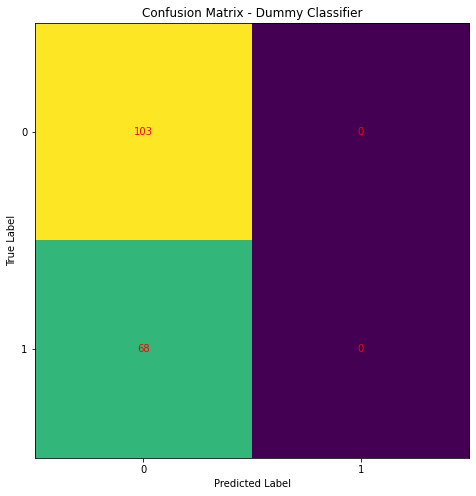

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("0", "1"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("0", "1"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.title("Confusion Matrix - Dummy Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy Score : " + str(accuracy_score(y_test, y_pred)))
print("Precision Score : " + str(precision_score(y_test, y_pred)))
print("Recall Score : " + str(recall_score(y_test, y_pred)))
print("F1 Score : " + str(f1_score(y_test, y_pred)))

# Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n" + str(confusion_matrix(y_test, y_pred)))

Accuracy Score : 0.9532163742690059
Precision Score : 0.9838709677419355
Recall Score : 0.8970588235294118
F1 Score : 0.9384615384615386
Confusion Matrix : 
[[102   1]
 [  7  61]]


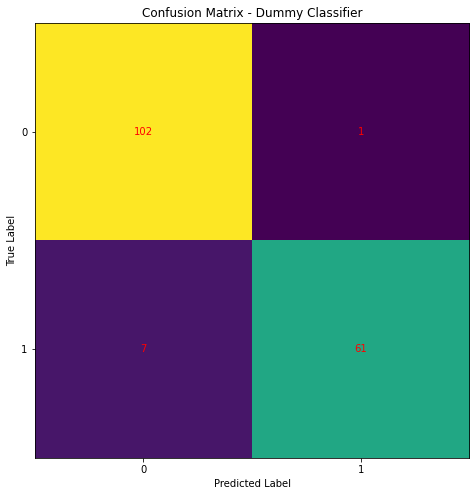

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("0", "1"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("0", "1"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.title("Confusion Matrix - Dummy Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()
grid_values = {"penalty": ["l1", "l2"], "C": [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
grid_clf_acc = GridSearchCV(clf, param_grid=grid_values, scoring="recall")
grid_clf_acc.fit(X_train, y_train)

# Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics
print("Accuracy Score : " + str(accuracy_score(y_test, y_pred_acc)))
print("Precision Score : " + str(precision_score(y_test, y_pred_acc)))
print("Recall Score : " + str(recall_score(y_test, y_pred_acc)))
print("F1 Score : " + str(f1_score(y_test, y_pred_acc)))

# Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test, y_pred_acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1302, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this trai

Accuracy Score : 0.9415204678362573
Precision Score : 0.9833333333333333
Recall Score : 0.8676470588235294
F1 Score : 0.9218749999999999


array([[102,   1],
       [  9,  59]], dtype=int64)

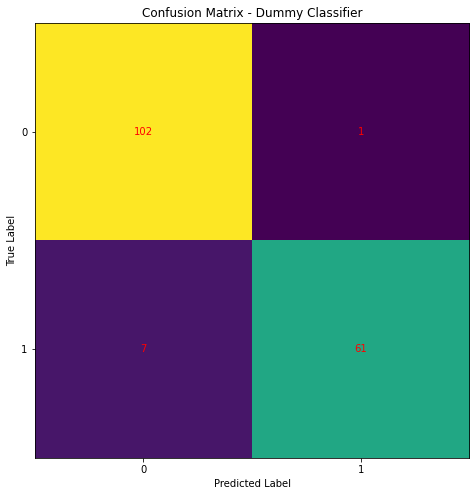

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("0", "1"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("0", "1"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.title("Confusion Matrix - Dummy Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()